In [1]:
from gurobipy import Model, GRB, quicksum

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
loc_x = [30,37,49,52,31,52,42,52,57,62,42,27,43,58,58,37,38,61,62,63,45,32,56]

In [5]:
loc_y = [40,52,49,64,62,33,41,41,58,42,57,68,67,48,27,69,46,33,63,69,35,39,37]

In [6]:
demand = [7,30,16,23,11,19,15,28,8,8,7,14,6,19,11,12,26,17,6,15,5,10]

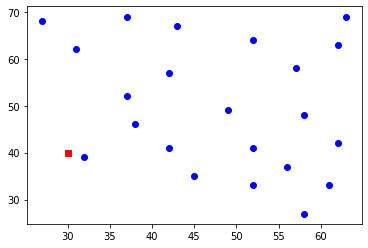

In [7]:
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.scatter(loc_x[1:], loc_y[1:], c='b')

In [8]:
n = 22

In [9]:
N = [i for i in range(1, n+1)]

In [10]:
V = [0] + N 

In [11]:
arcs_for_savings = [(i, j) for i in V for j in V if i != j]

In [12]:
arcs_for_savings

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 

In [13]:
Q = 40

In [14]:
savings = {(i, j):    (np.hypot(loc_x[i]-loc_x[0], loc_y[i]-loc_y[0]))
                    +(np.hypot(loc_x[0]-loc_x[j], loc_y[0]-loc_y[j]))
                    -(np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j])) for i, j in arcs_for_savings}

In [15]:
savings

{(0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.0,
 (0, 6): 0.0,
 (0, 7): 0.0,
 (0, 8): 0.0,
 (0, 9): 0.0,
 (0, 10): 0.0,
 (0, 11): 0.0,
 (0, 12): 0.0,
 (0, 13): 0.0,
 (0, 14): 0.0,
 (0, 15): 0.0,
 (0, 16): 0.0,
 (0, 17): 0.0,
 (0, 18): 0.0,
 (0, 19): 0.0,
 (0, 20): 0.0,
 (0, 21): 0.0,
 (0, 22): 0.0,
 (1, 0): 0.0,
 (1, 2): 22.546923154225464,
 (1, 3): 27.24071246935067,
 (1, 4): 24.25325574530444,
 (1, 5): 12.771799876859784,
 (1, 6): 13.85099259464753,
 (1, 7): 17.314084297256766,
 (1, 8): 25.461792450804605,
 (1, 9): 19.02905903754008,
 (1, 10): 27.63002822426914,
 (1, 11): 23.184737405994046,
 (1, 12): 27.703597695589686,
 (1, 13): 21.63532522013993,
 (1, 14): 12.113486635687046,
 (1, 15): 26.725311769802403,
 (1, 16): 17.809681459151584,
 (1, 17): 15.062485423563277,
 (1, 18): 25.98756441243054,
 (1, 19): 26.759760128409262,
 (1, 20): 10.915538062235765,
 (1, 21): 2.2001236897654763,
 (1, 22): 15.857511772234194,
 (2, 0): 0.0,
 (2, 1): 22.546923154225464,
 (2, 3)

In [16]:
distance = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in arcs_for_savings}

In [17]:
distance

{(0, 1): 13.892443989449804,
 (0, 2): 21.02379604162864,
 (0, 3): 32.55764119219941,
 (0, 4): 22.02271554554524,
 (0, 5): 23.08679276123039,
 (0, 6): 12.041594578792296,
 (0, 7): 22.02271554554524,
 (0, 8): 32.449961479175904,
 (0, 9): 32.0624390837628,
 (0, 10): 20.808652046684813,
 (0, 11): 28.160255680657446,
 (0, 12): 29.966648127543394,
 (0, 13): 29.120439557122072,
 (0, 14): 30.870698080866262,
 (0, 15): 29.832867780352597,
 (0, 16): 10.0,
 (0, 17): 31.78049716414141,
 (0, 18): 39.408120990476064,
 (0, 19): 43.93176527297759,
 (0, 20): 15.811388300841896,
 (0, 21): 2.23606797749979,
 (0, 22): 26.1725046566048,
 (1, 0): 13.892443989449804,
 (1, 2): 12.36931687685298,
 (1, 3): 19.209372712298546,
 (1, 4): 11.661903789690601,
 (1, 5): 24.20743687382041,
 (1, 6): 12.083045973594572,
 (1, 7): 18.601075237738275,
 (1, 8): 20.8806130178211,
 (1, 9): 26.92582403567252,
 (1, 10): 7.0710678118654755,
 (1, 11): 18.867962264113206,
 (1, 12): 16.15549442140351,
 (1, 13): 21.37755832643195,
 (

In [18]:
r = 8

In [19]:
mdl = Model('CVRP')

Using license file /Users/berkayakbas/gurobi.lic
Academic license - for non-commercial use only


In [20]:
x = mdl.addVars(arcs_for_savings, vtype=GRB.BINARY)
y = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [21]:
mdl.setObjective(quicksum(x[i, j] * savings[i, j] for  i, j in arcs_for_savings), GRB.MAXIMIZE )

In [22]:
mdl.addConstr(quicksum(x[ 0 , j ] for j in N) == r)
mdl.addConstrs(quicksum(x[ i , j ] for i in V if i != j) == 1 for j in N)
mdl.addConstrs(quicksum(x[ i , j ] for j in N if i != j) <= 1 for i in N)
mdl.addConstrs(y[i]+ demand[i-1]*x[ i , j ]- Q * ( 1 - x[ i , j ]) <= y[j] for i in N for j in N if i != j)
mdl.addConstrs(demand[ i-1 ] <= y[ i ] for i in N)
mdl.addConstrs(y[ i ] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [23]:
mdl.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 551 rows, 528 columns and 2398 nonzeros
Model fingerprint: 0x65a7a485
Variable types: 22 continuous, 506 integer (506 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 132 rows and 110 columns
Presolve time: 0.02s
Presolved: 419 rows, 418 columns, 1862 nonzeros
Variable types: 18 continuous, 400 integer (400 binary)

Root relaxation: objective 7.239756e+02, 100 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  723.97563    0   28          -  723.97563      -     -    0s
H    0     0                     467.2108694  723.97563  55.0%     -    0s
H    0     0                     525.3709922  723.97563  37.8%     -    0s
     0     0  715.2424

In [24]:
active_arcs = [a for a in arcs_for_savings if x[a].x > 0.99]

In [25]:
active_arcs

[(0, 1),
 (0, 5),
 (0, 6),
 (0, 11),
 (0, 13),
 (0, 14),
 (0, 16),
 (0, 21),
 (1, 10),
 (3, 2),
 (5, 22),
 (6, 20),
 (9, 7),
 (10, 3),
 (11, 15),
 (12, 4),
 (13, 18),
 (14, 17),
 (15, 12),
 (18, 19),
 (19, 8),
 (22, 9)]

In [26]:
added_arcs = [(2,0),(4,0),(7,0),(8,0),(16,0),(17,0),(20,0),(21,0)]
active_arcs = active_arcs + added_arcs

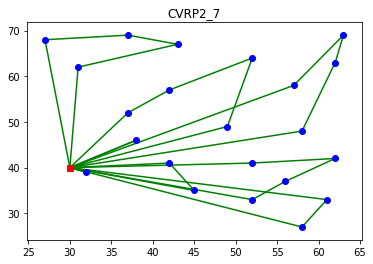

In [27]:
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', zorder=0)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.scatter(loc_x[1:], loc_y[1:], c='b')
plt.title('CVRP2_7')
plt.savefig('CVRP2_7')

In [28]:
Total_Sum = 0
for i,j in active_arcs:
    Total_Sum = Total_Sum + distance[(i,j)]
print(Total_Sum)

441.7748363140499


In [29]:
z = [1,2,3,4,5,6,7,8]
v = [0,1,2,3,4,5,6,7]

model = Model('trial')

model.setObjective(j[i] for i in range(len(z)), GRB.MAXIMIZE )

model.addConstr(j[i] = max_(z[i],v[i]) for i in range(len(z))
              
model.optimize()

SyntaxError: invalid syntax (<ipython-input-29-44940a7cc5b6>, line 8)